<a href="https://colab.research.google.com/github/tanyagadwal/Drug-Consumption-Analysis/blob/main/Drug_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression


In [4]:
df = pd.read_csv("Drug_Consumption.csv")
df = df.drop('ID', axis=1)
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [5]:
df.isna().sum().sum() #checks for missing values


0

In [6]:
df.replace({'CL0':0,'CL1':0,'CL2':0,'CL3':1,'CL4':1,'CL5':1,'CL6':1}, inplace=True)


In [7]:
len(df.index)

1884

In [8]:
df.drop(['Caff', 'Choc'], axis=1, inplace=True)  #dropping caffeine column and chocolate column


# Data Visualisation

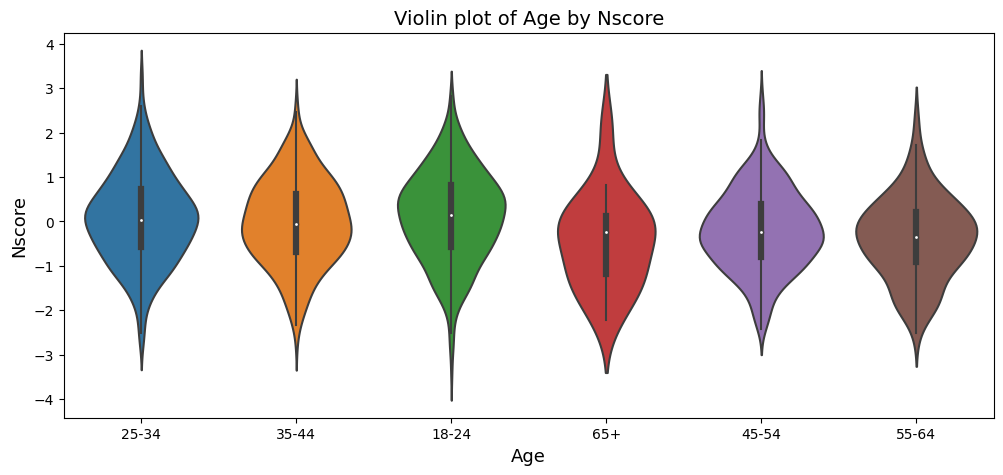

In [9]:
plt.figure(figsize=(12,5))
sns.violinplot(x='Age', y='Nscore', data=df)
plt.title('Violin plot of Age by Nscore',fontsize=14)
plt.xlabel('Age',fontsize=13)
plt.ylabel('Nscore',fontsize=13)
plt.show()

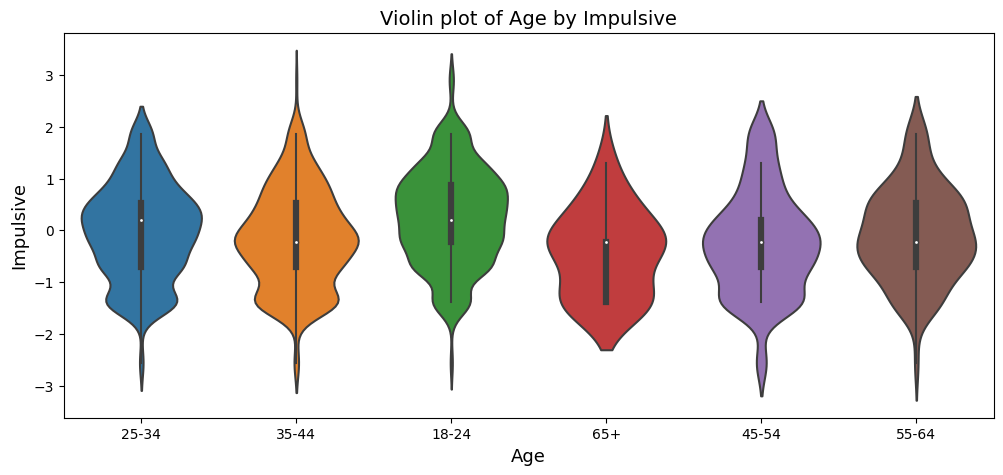

In [10]:
plt.figure(figsize=(12,5))
sns.violinplot(x='Age', y='Impulsive', data=df)
plt.title('Violin plot of Age by Impulsive',fontsize=14)
plt.xlabel('Age',fontsize=13)
plt.ylabel('Impulsive',fontsize=13)
plt.show()

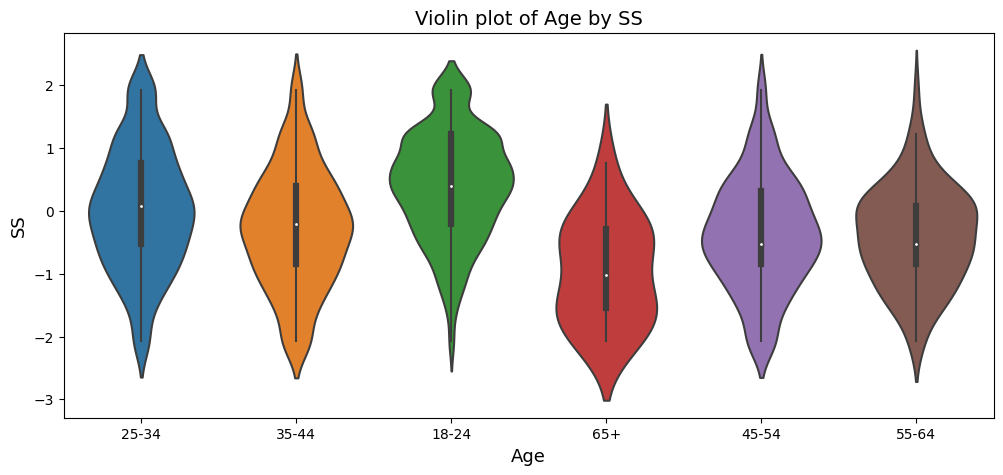

In [11]:
plt.figure(figsize=(12,5))
sns.violinplot(x='Age', y='SS', data=df)
plt.title('Violin plot of Age by SS',fontsize=14)
plt.xlabel('Age',fontsize=13)
plt.ylabel('SS',fontsize=13)
plt.show()

In [12]:
df.isna().sum()

Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
AScore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Cannabis     0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [13]:
drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Cannabis','Coke',
        'Crack', 'Ecstasy', 'Heroin', 'Ketamine','Legalh',
        'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']


In [14]:
drug_mean = []
for column in drugs:
    mean = df[column].mean()
    drug_mean.append(mean)

In [15]:
drug_dic = {'drug': drugs,
            'average_use': drug_mean}
drug_use = pd.DataFrame.from_dict(drug_dic)
drug_use = drug_use.sort_values(['average_use'], ascending=False)

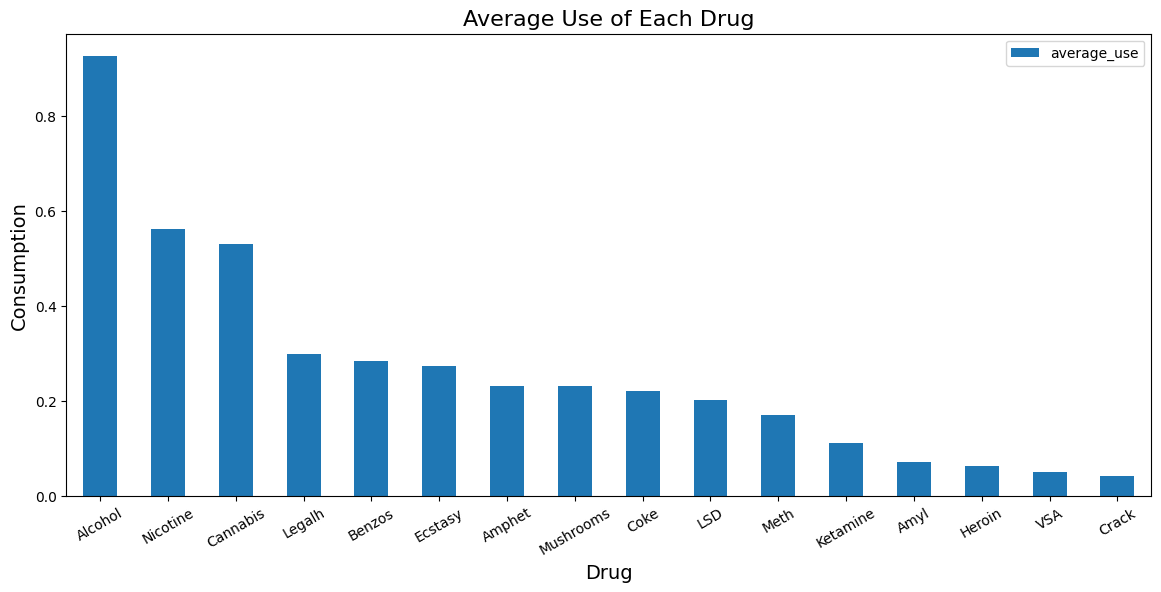

In [16]:
drug_use.plot(kind='bar', x='drug', y='average_use', figsize=(14, 6))
plt.title('Average Use of Each Drug', size=16)
plt.xlabel('Drug', size=14)
plt.xticks(rotation=30)
plt.ylabel('Consumption', size=14)
plt.show()

By this, we observe that amongst the legal drugs, alcohol and nicotine are consumed the most whereas amongst the illegal drugs, cannabis is consumed the most and is almost at par with nicotine

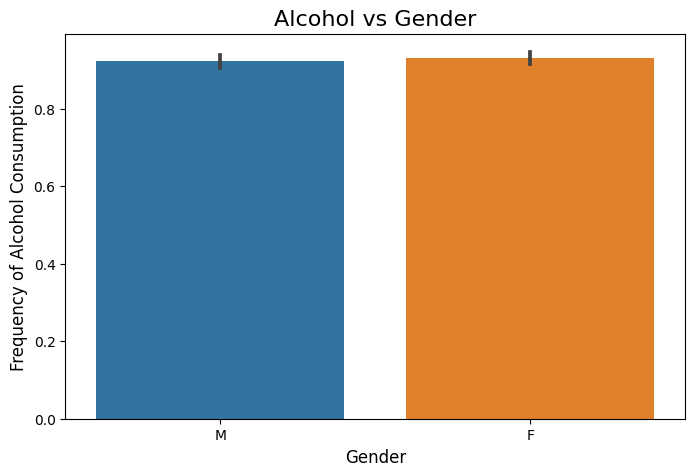

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Gender'], y=df['Alcohol'])
plt.title('Alcohol vs Gender', size=16)
plt.xlabel('Gender', size=12)
plt.ylabel('Frequency of Alcohol Consumption', size=12)
plt.show()


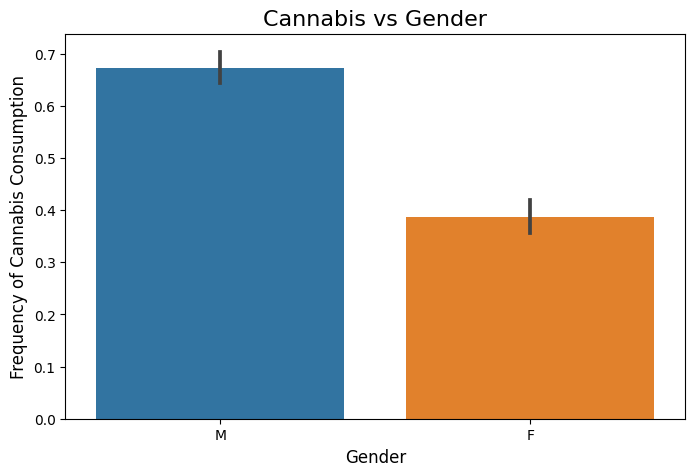

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Gender'], y=df['Cannabis'])
plt.title('Cannabis vs Gender', size=16)
plt.xlabel('Gender', size=12)
plt.ylabel('Frequency of Cannabis Consumption', size=12)
plt.show()


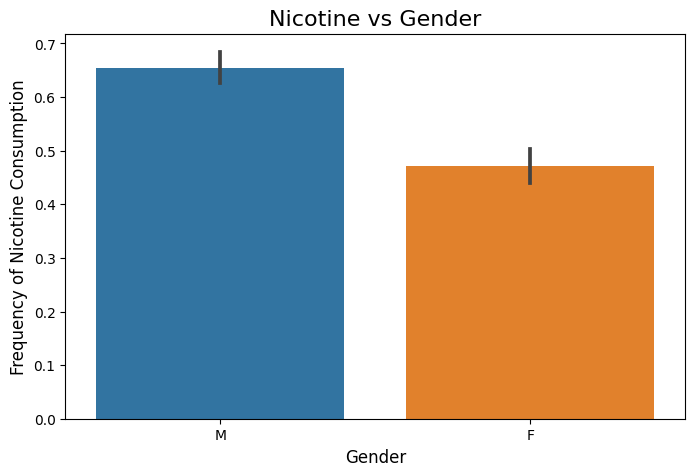

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Gender'], y=df['Nicotine'])
plt.title('Nicotine vs Gender', size=16)
plt.xlabel('Gender', size=12)
plt.ylabel('Frequency of Nicotine Consumption', size=12)
plt.show()

Men consume more nicotine and cannabis more frequently than women. The frequency of alcohol consumed by men and women is almost the same

<ipython-input-20-257a970de7b9>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,1)


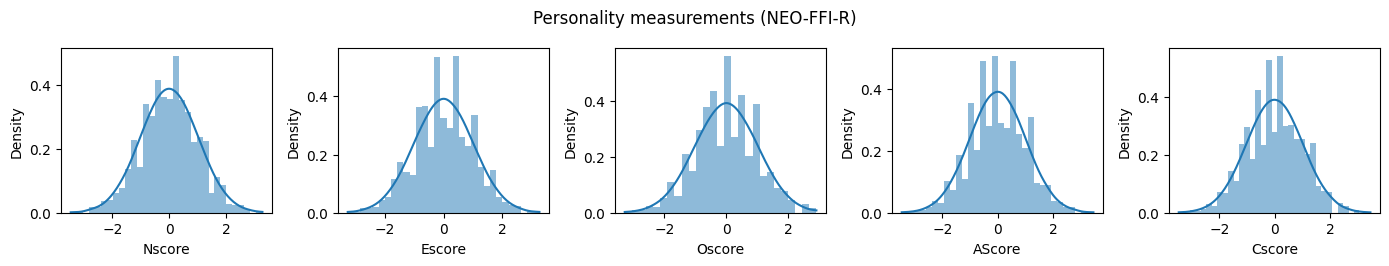

In [20]:
fig, ax = plt.subplots(figsize=(14,4.5))
plt.subplot(2,5,1)
sns.histplot(df['Nscore'], kde=True, stat="density", linewidth=0)

plt.subplot(2,5,2)
sns.histplot(df['Escore'], kde=True, stat="density", linewidth=0)

plt.subplot(2,5,3)
sns.histplot(df['Oscore'], kde=True, stat="density", linewidth=0)

plt.subplot(2,5,4)
sns.histplot(df['AScore'], kde=True, stat="density", linewidth=0)

plt.subplot(2,5,5)
sns.histplot(df['Cscore'], kde=True, stat="density", linewidth=0)

fig.suptitle('Personality measurements (NEO-FFI-R)')
plt.tight_layout()
plt.show()

<ipython-input-21-0220a625da02>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


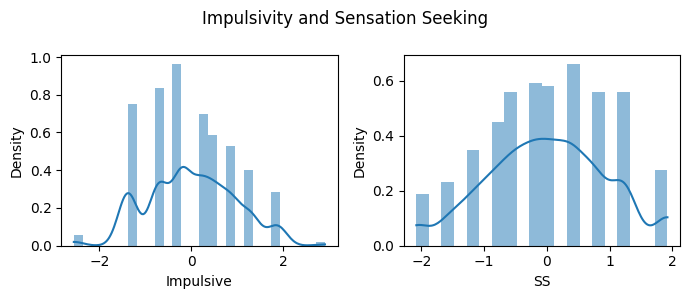

In [21]:
fig, ax = plt.subplots(figsize=(7, 3))
plt.subplot(1,2,1)
sns.histplot(df['Impulsive'], kde=True, stat="density", linewidth=0)

plt.subplot(1,2,2)
sns.histplot(df['SS'], kde=True, stat="density", linewidth=0)

fig.suptitle('Impulsivity and Sensation Seeking')
plt.tight_layout()
plt.show()


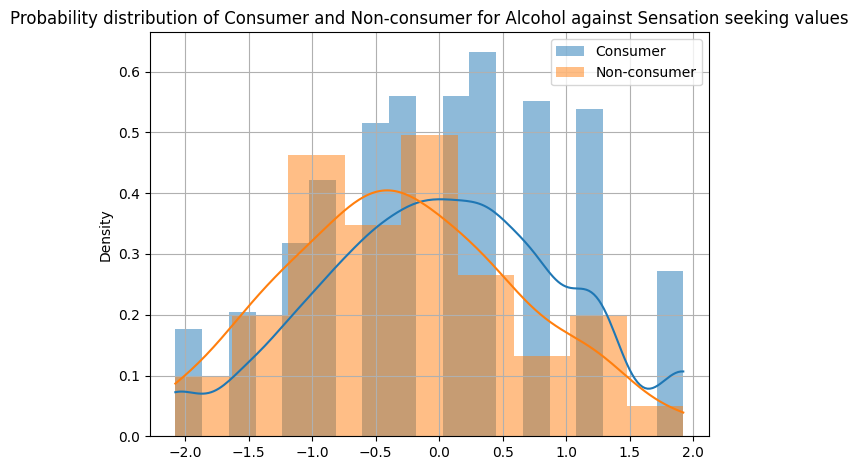

In [22]:
fig, ax = plt.subplots()
alc_nonconsumer = []
alc_consumer = []

for _, row in df.iterrows():
    if row.Alcohol == 0:
      alc_nonconsumer.append(row.SS)
    else:
      alc_consumer.append(row.SS)


sns.histplot(x=alc_consumer, kde=True, stat="density", label='Consumer',linewidth=0)
sns.histplot(x=alc_nonconsumer, kde=True, stat="density", label='Non-consumer', linewidth=0)


plt.legend()
plt.grid()
plt.title('Probability distribution of Consumer and Non-consumer for Alcohol against Sensation seeking values')
plt.tight_layout()
plt.show()

Most consumers have a higher sensation seeking values than non-consumers of alcohol

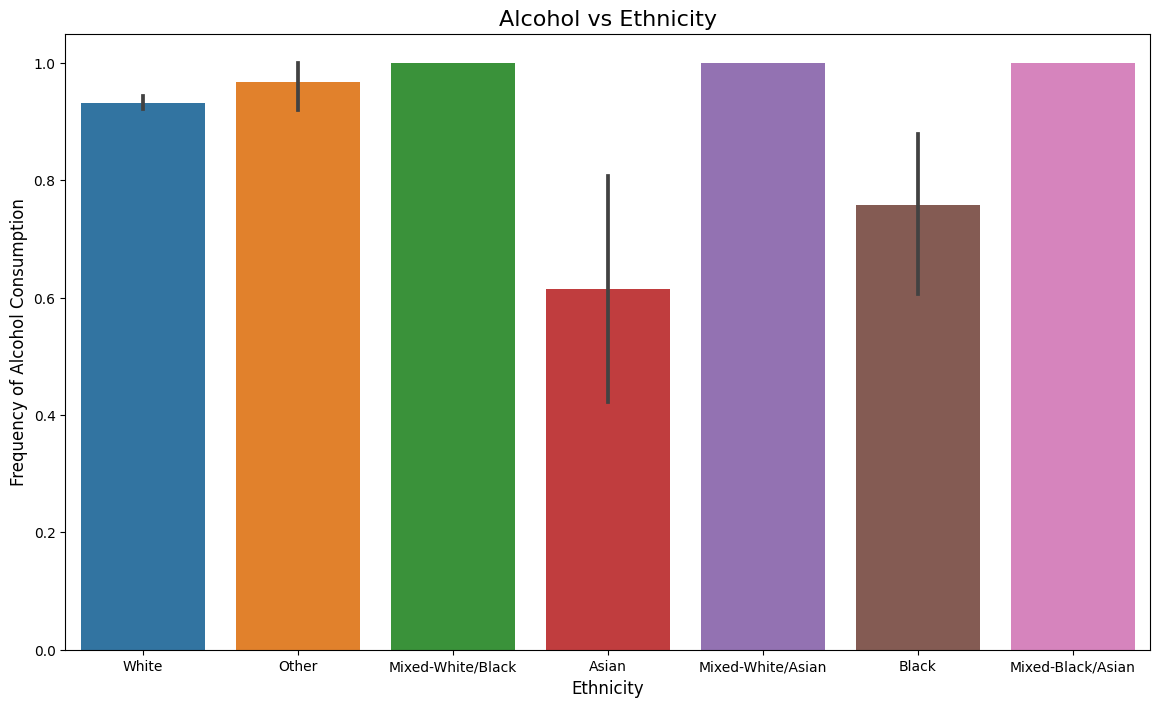

In [23]:
plt.figure(figsize=(14,8))
sns.barplot(x=df['Ethnicity'], y=df['Alcohol'])
plt.title('Alcohol vs Ethnicity', size=16)
plt.xlabel('Ethnicity', size=12)
plt.ylabel('Frequency of Alcohol Consumption', size=12)
plt.show()

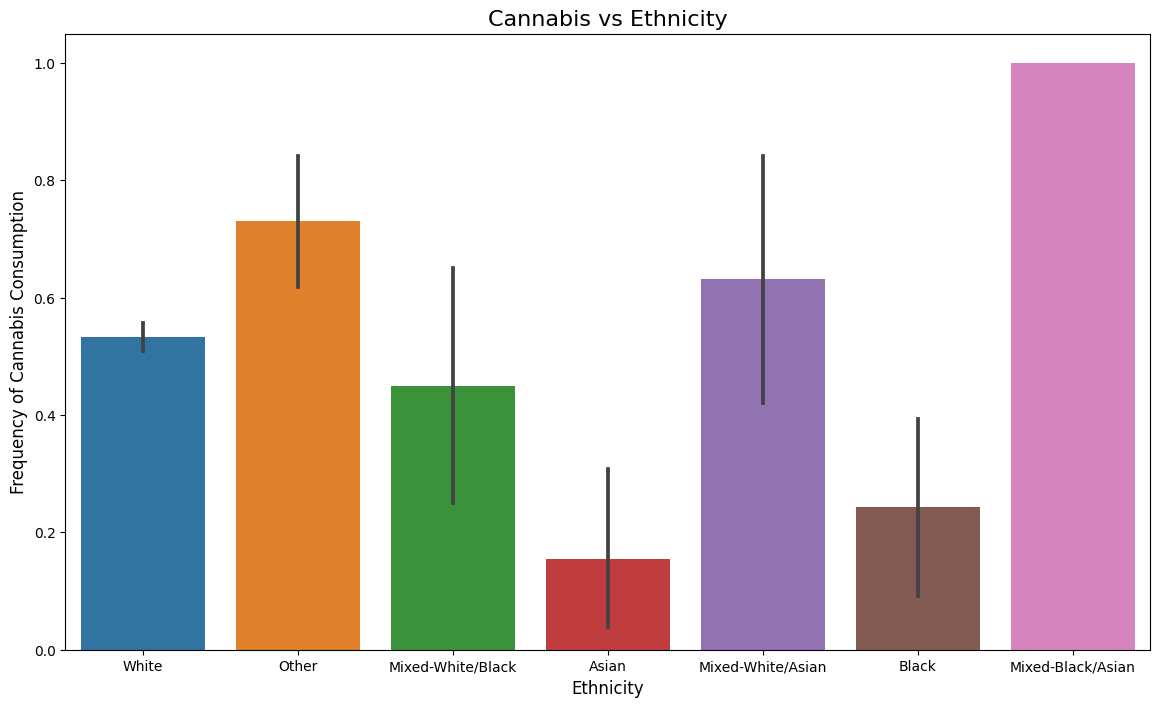

In [24]:
plt.figure(figsize=(14,8))
sns.barplot(x=df['Ethnicity'], y=df['Cannabis'])
plt.title('Cannabis vs Ethnicity', size=16)
plt.xlabel('Ethnicity', size=12)
plt.ylabel('Frequency of Cannabis Consumption', size=12)
plt.show()

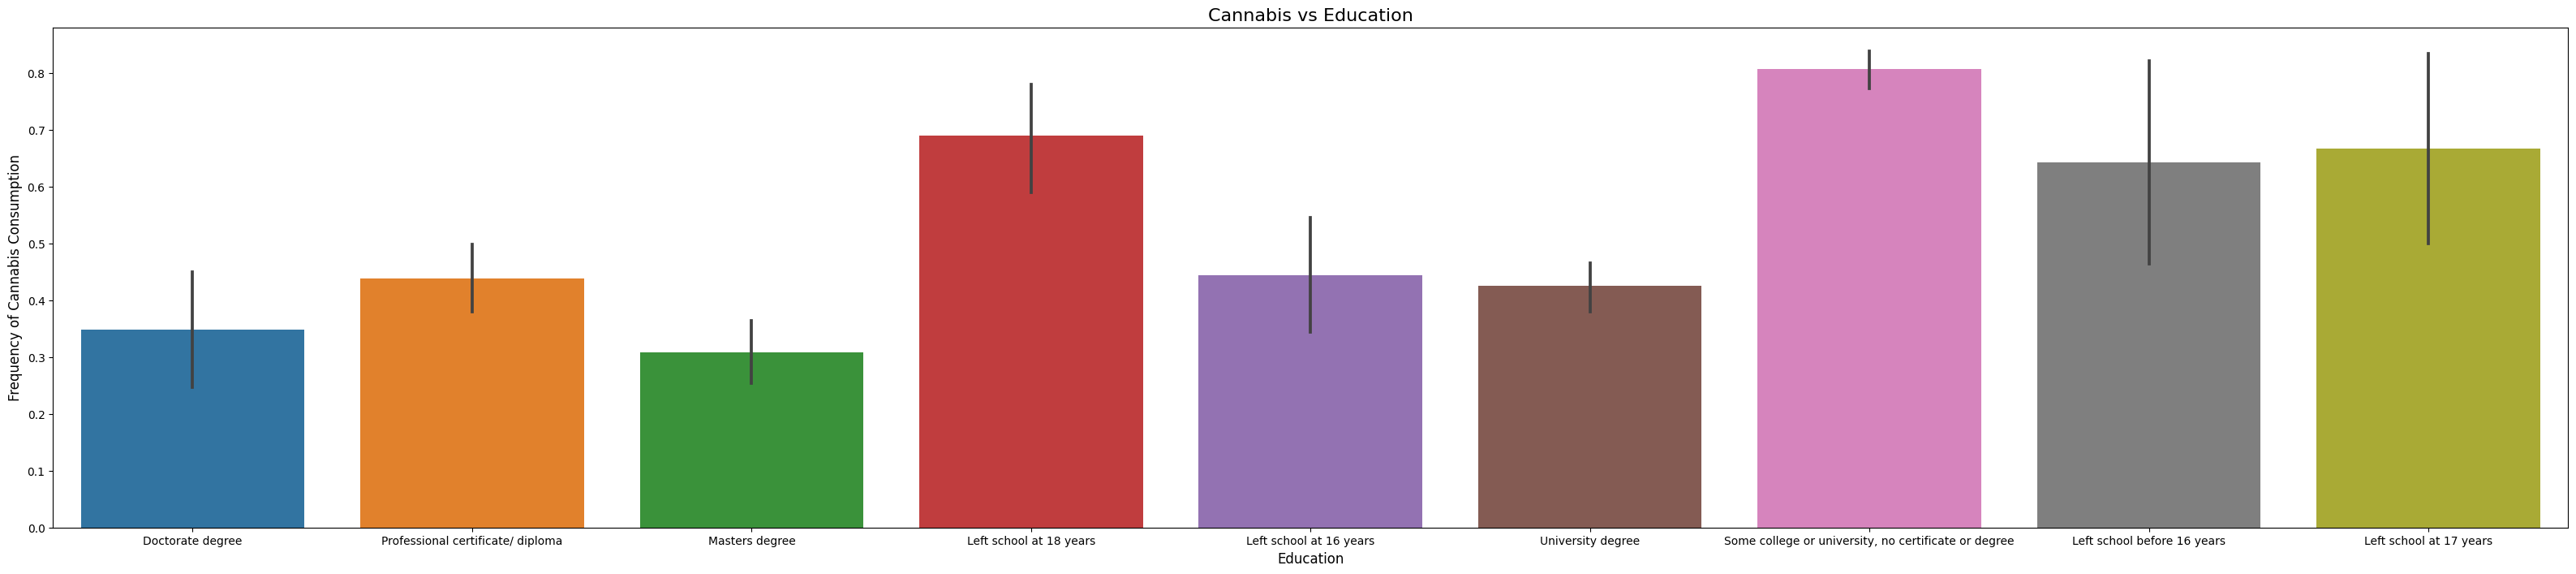

In [25]:
plt.figure(figsize=(40,8))
sns.barplot(x=df['Education'], y=df['Cannabis'])
plt.title('Cannabis vs Education', size=16)
plt.xlabel('Education', size=12)
plt.ylabel('Frequency of Cannabis Consumption', size=12)
plt.show()

It can be observed that individuals without a college degree are more likely to use Cannabis

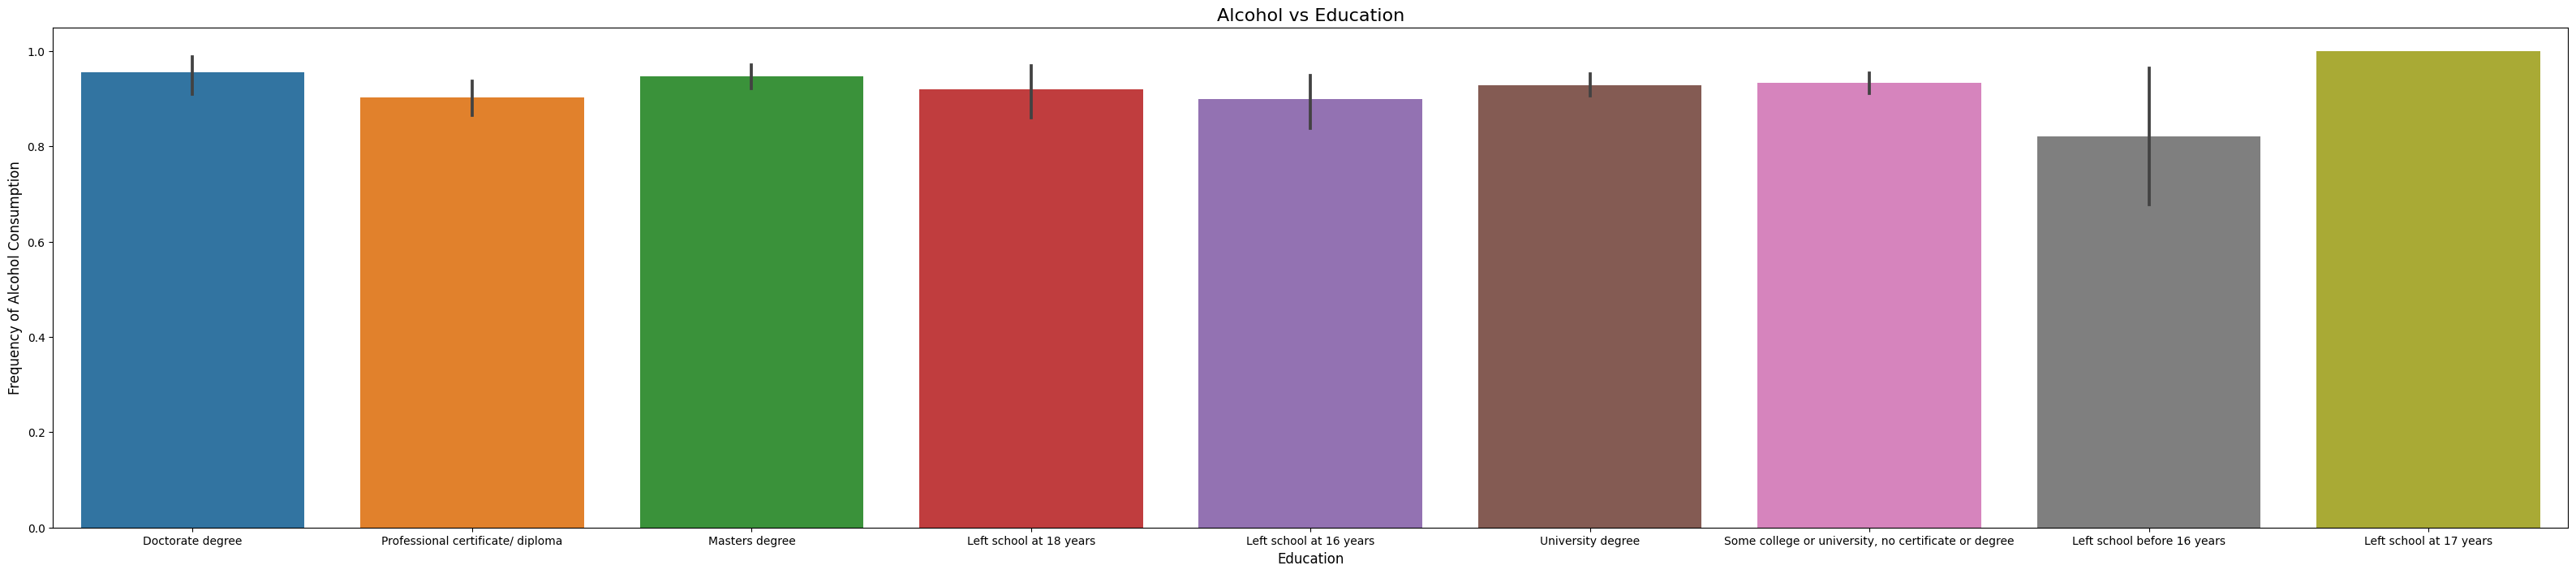

In [26]:
plt.figure(figsize=(40,8))
sns.barplot(x=df['Education'], y=df['Alcohol'])
plt.title('Alcohol vs Education', size=16)
plt.xlabel('Education', size=12)
plt.ylabel('Frequency of Alcohol Consumption', size=12)
plt.show()

# Correlation Analysis for data reduction

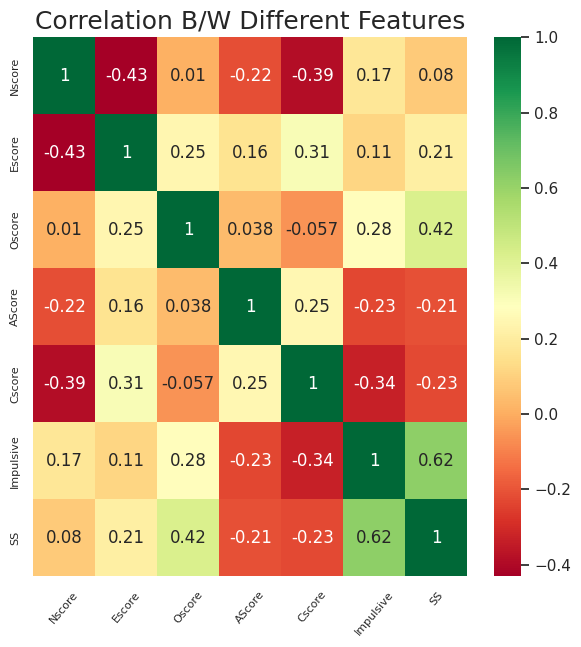

In [27]:
features = df[['Nscore','Escore','Oscore','AScore','Cscore','Impulsive','SS']].copy()
corrmat = features.corr()
plt.figure(figsize=(7,7))
sns.set(font_scale=1)
hm = sns.heatmap(corrmat,cmap = 'RdYlGn',annot=True,
             yticklabels = features.columns, xticklabels = features.columns)
plt.xticks(fontsize=8,rotation=50)
plt.yticks(fontsize=8)
plt.title("Correlation B/W Different Features",fontsize=18)
plt.show()


Impulsive and Sensation seeking are strongly related to each other. Nscore and Escore are strongly negatively related. However the correlation coefficients arent large enough so as to remove one of the features

# Encoding the data: Vectorization, Scaling and Normalization to prepare for models


In [28]:
df.replace({'Country':{'Republic of Ireland':'Ireland','New Zealand':'NZ'}}, inplace=True)

vectorizer = CountVectorizer()
vectorizer.fit(df['Country'])

# Transform the country column into a numerical feature vector
vectorized_countries = vectorizer.fit_transform(df['Country']).toarray()
df_vectorizedcountries = pd.DataFrame(vectorized_countries, columns=vectorizer.get_feature_names_out())
df = pd.concat([df, df_vectorizedcountries], axis=1)
df.drop(['Country'], axis=1, inplace=True)
df.head()


,Age,Gender,Education,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,...,Nicotine,Semer,VSA,australia,canada,ireland,nz,other,uk,usa
0,25-34,M,Doctorate degree,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,1,0,0,0,0,0,0,0,1,0
1,35-44,M,Professional certificate/ diploma,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,0,0,0,0,0,0,0,0,1,0
2,18-24,F,Masters degree,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,0,0,0,0,0,0,0,0,1,0
3,35-44,F,Doctorate degree,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,0,0,0,0,0,0,0,0,1,0
4,65+,F,Left school at 18 years,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,...,1,0,0,0,1,0,0,0,0,0


In [29]:
vectorizer.fit(df['Ethnicity'])

# Transform the ethnicity column into a numerical feature vector
vectorized_ethnicity = vectorizer.fit_transform(df['Ethnicity']).toarray()
df_vectorizedethnicities = pd.DataFrame(vectorized_ethnicity, columns=vectorizer.get_feature_names_out())
df = pd.concat([df, df_vectorizedethnicities], axis=1)
df.drop(['Ethnicity'], axis=1, inplace=True)
df.head()


,Age,Gender,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,...,ireland,nz,other,uk,usa,asian,black,mixed,other,white
0,25-34,M,Doctorate degree,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,...,0,0,0,1,0,0,0,0,0,1
1,35-44,M,Professional certificate/ diploma,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,...,0,0,0,1,0,0,0,0,0,1
2,18-24,F,Masters degree,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,...,0,0,0,1,0,0,0,0,0,1
3,35-44,F,Doctorate degree,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,...,0,0,0,1,0,0,0,0,0,1
4,65+,F,Left school at 18 years,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,...,0,0,0,0,0,0,0,0,0,1


In [30]:
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','))
vectorizer.fit(df['Education'])

# Transform the education column into a numerical feature vector
vectorized_edu = vectorizer.fit_transform(df['Education']).toarray()
df_vectorizededu = pd.DataFrame(vectorized_edu, columns=vectorizer.get_feature_names_out())
df = pd.concat([df, df_vectorizededu], axis=1)
df.drop(['Education'], axis=1, inplace=True)
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,Age,Gender,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,...,no certificate or degree,doctorate degree,left school at 16 years,left school at 17 years,left school at 18 years,left school before 16 years,masters degree,professional certificate/ diploma,some college or university,university degree
0,25-34,M,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,...,0,1,0,0,0,0,0,0,0,0
1,35-44,M,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,...,0,0,0,0,0,0,0,1,0,0
2,18-24,F,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,...,0,0,0,0,0,0,1,0,0,0
3,35-44,F,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,...,0,1,0,0,0,0,0,0,0,0
4,65+,F,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
le = LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [32]:
df.replace({'Age':{'65+':'65-74'}}, inplace=True)
df[['min_age', 'max_age']] = df['Age'].str.split('-', expand=True).astype(int)
df['mean_age'] = (df['min_age'] + df['max_age']) / 2
df['Age'] = df['mean_age']
df.drop(columns=['min_age', 'max_age', 'mean_age'], inplace=True)

In [33]:
scaler = StandardScaler()

# Scale the selected columns of the dataframe
df[['Age']] = scaler.fit_transform(df[['Age']])

In [34]:
df = df.drop(df[df['Semer'] != 0].index)
len(df.index)

1881

In [35]:
data = df.copy()
data.drop(["Amphet", "Amyl", "Benzos", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "Meth", "Mushrooms","VSA"], axis=1, inplace=True)
data.head()

,Age,Gender,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,...,no certificate or degree,doctorate degree,left school at 16 years,left school at 17 years,left school at 18 years,left school before 16 years,masters degree,professional certificate/ diploma,some college or university,university degree
0,-0.324046,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,...,0,1,0,0,0,0,0,0,0,0
1,0.492735,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,...,0,0,0,0,0,0,0,1,0,0
2,-1.018311,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,...,0,0,0,0,0,0,1,0,0,0
3,0.492735,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,...,0,1,0,0,0,0,0,0,0,0
4,2.943080,0,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
data.drop(['Semer'],axis=1, inplace=True)

In [37]:
#Upsampling becaause data is biased
alcconsumer = data[data["Alcohol"] == 1]
alcnonconsumer  = data[data["Alcohol"] == 0]
nonconsumer_upsample = resample(alcnonconsumer,
             replace=True,
             n_samples=len(alcconsumer),
             random_state=42)
data_upsampled = pd.concat([data,nonconsumer_upsample])


# Selecting Alcohol as the Y label

In [38]:
feature_cols = ['Age','Gender','Nscore','Escore','Oscore','AScore','Cscore','Impulsive','SS']

X = data_upsampled[feature_cols]
Y = data_upsampled['Alcohol']


# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)

In [39]:
normalizer = Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)


# Logistic Regression

In [40]:
lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.6251378169790518

In [42]:
y_predict = lr.predict(X_test)
target_names = ['Unlikely to Use', 'Will Use']
log_report = classification_report(y_test, y_predict,target_names=target_names)
print(log_report)

                 precision    recall  f1-score   support

Unlikely to Use       0.65      0.65      0.65       487
       Will Use       0.60      0.60      0.60       420

       accuracy                           0.63       907
      macro avg       0.62      0.62      0.62       907
   weighted avg       0.63      0.63      0.63       907



# Decision Tree

Training Data Score:  0.7933823529411764
Testing Data Score:  0.7717750826901875
                 precision    recall  f1-score   support

Unlikely to Use       0.72      0.93      0.81       487
       Will Use       0.88      0.59      0.71       420

       accuracy                           0.77       907
      macro avg       0.80      0.76      0.76       907
   weighted avg       0.79      0.77      0.76       907



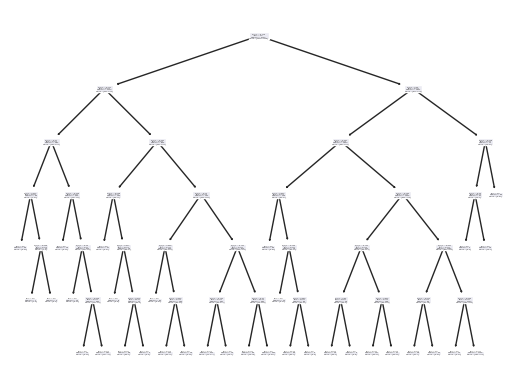

In [43]:
clf = tree.DecisionTreeClassifier(max_depth=6, random_state=42)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)
print("Training Data Score: ",clf.score(X_train, y_train))
print("Testing Data Score: ",clf.score(X_test, y_test))
target_names = ['Unlikely to Use', 'Will Use']
# Print classification report

# Make predictions for Decisiontree
y_predict = clf.predict(X_test)
log_report = classification_report(y_test, y_predict,target_names=target_names)
print(log_report)

In [44]:
print("Confusion Matrix Tree : \n", confusion_matrix(y_test, y_predict),"\n")
print("The precision for Tree is ",precision_score(y_test, y_predict))
print("The recall for Tree is ",recall_score(y_test, y_predict),"\n")


Confusion Matrix Tree : 
 [[452  35]
 [172 248]] 

The precision for Tree is  0.8763250883392226
The recall for Tree is  0.5904761904761905 



In [45]:
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 5)
print("Accuracy:{:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f} %".format(accuracies.std()*100))


Accuracy:74.56 %
Standard Deviation:1.60 %


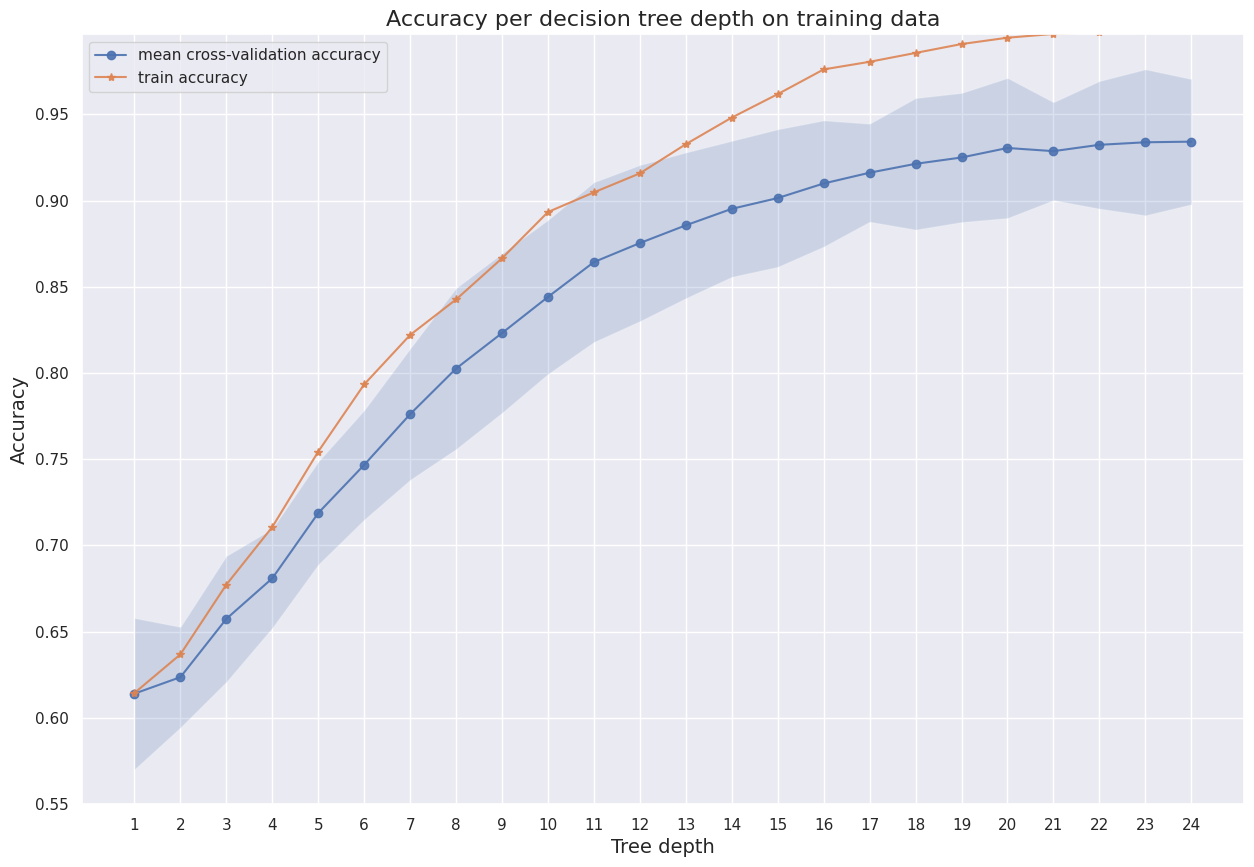

In [46]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores


# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,10))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores,
                               'Accuracy per decision tree depth on training data')


# XGBoost

In [47]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)
predxgb = xgb_cl.predict(X_test)
accuracy_score(y_test, predxgb)

0.9867695700110254

In [48]:
param_grid = {
    "max_depth": [1,3,5,7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10, 15],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.8],
}

xgb_cl = xgb.XGBClassifier(objective="binary:logistic")
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=5, scoring="accuracy")
grid_cv.fit(X_train, y_train)
grid_cv.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 1,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [49]:
print(grid_cv.best_score_)

0.9963235294117647
